In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, pathlib

# Reading logs

In [2]:
mi_path = pathlib.Path(r'C:\Users\MQTyor\ai_pc\Reserch_ai\Information_Theory\SMI creation\Reproduction\MNIST experiments\Information-v3\data\mutual_information\MNIST\results\28-May-2024_224859')
smi_path = pathlib.Path(r'C:\Users\MQTyor\ai_pc\Reserch_ai\Information_Theory\SMI creation\Reproduction\MNIST experiments\Information-v3\data\mutual_information\MNIST\results_smi\29-May-2024_080230')

dd_mi = {'ixl':{}, 'ily':{}}
dd_smi = {'ixl':{}, 'ily':{}}

for i in range(1,6):
    # MI
    filepath = mi_path / f"layer {i}.csv"
    df = pd.read_csv(filepath)
    dd_mi['ixl'][i] = df['I(X;L)'].values
    dd_mi['ily'][i] = df['I(L;Y)'].values
    # SMI
    filepath = smi_path / f"layer {i}.csv"
    df = pd.read_csv(filepath)
    dd_smi['ixl'][i] = df['I(X;L)'].values
    dd_smi['ily'][i] = df['I(L;Y)'].values

# Plotting 2x5 plox

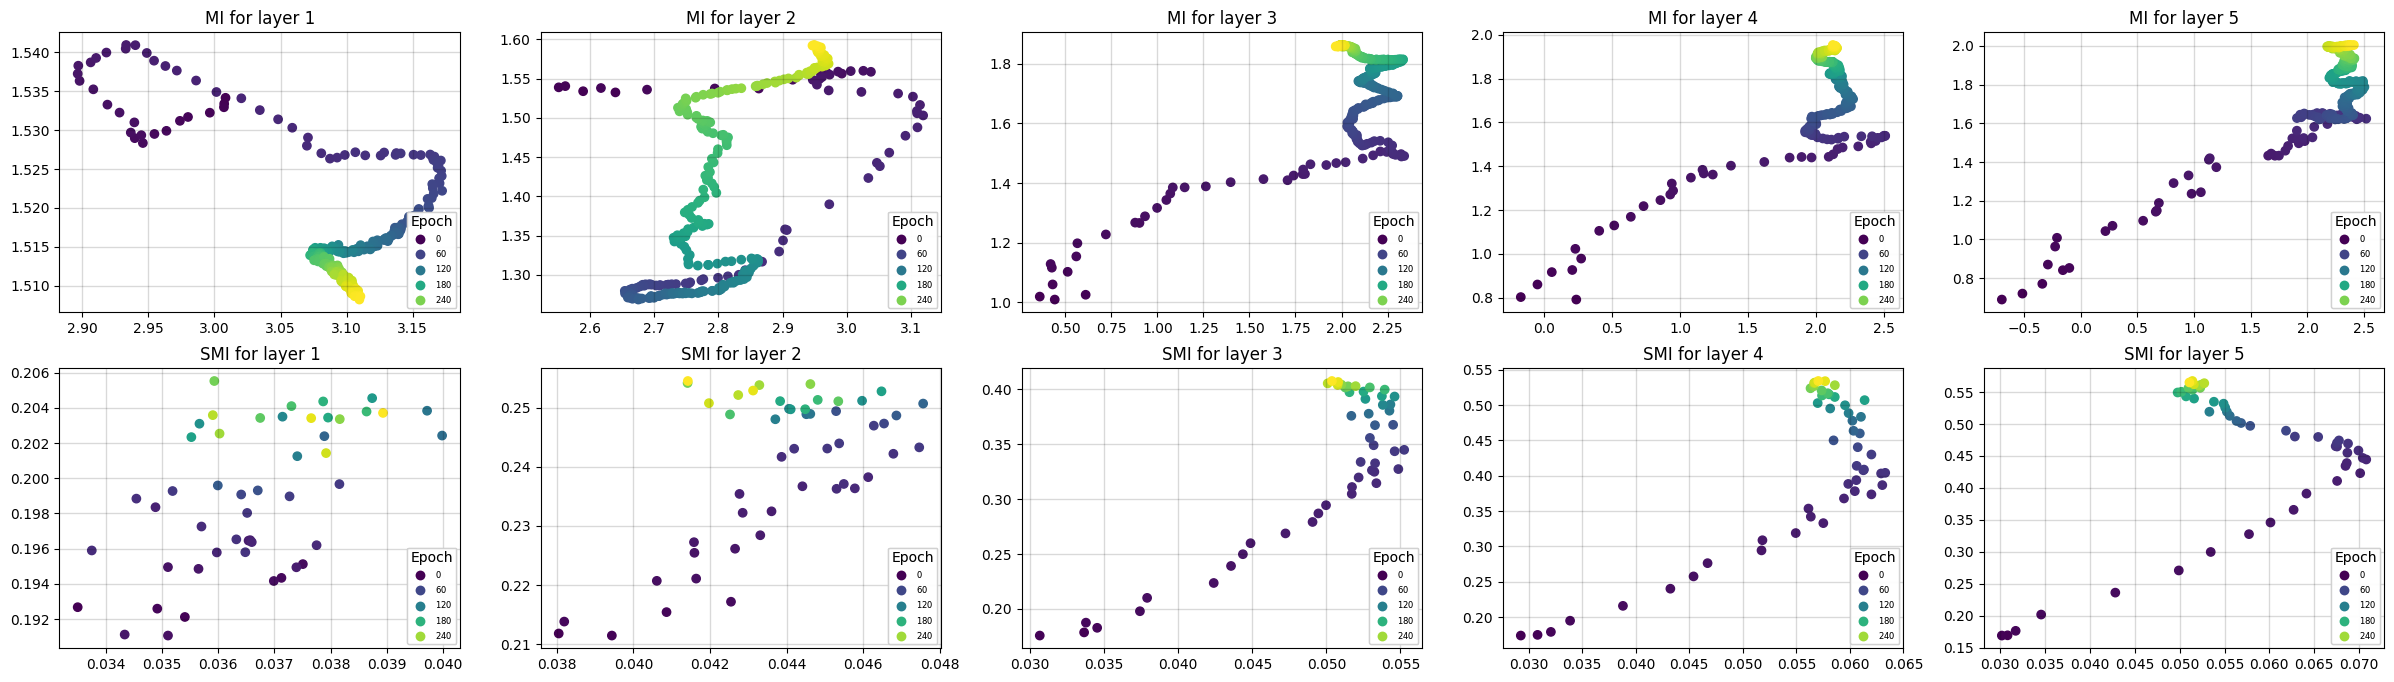

In [3]:
# Number of rows.
n_rows = 2
n_columns = 5

width = 6
height = 4
fig, ax = plt.subplots(n_rows, n_columns, figsize=(width * n_columns, height * n_rows))
for index in range(5):
    ax1 = ax[0, index]
    ax2 = ax[1, index]
    
    ax1.grid(color='#000000', alpha=0.15, linestyle='-', linewidth=1, which='major')
    ax1.grid(color='#000000', alpha=0.1, linestyle='-', linewidth=0.5, which='minor')
    ax2.grid(color='#000000', alpha=0.15, linestyle='-', linewidth=1, which='major')
    ax2.grid(color='#000000', alpha=0.1, linestyle='-', linewidth=0.5, which='minor')
    
    ax1.set_title(f"MI for layer {index+1}")
    ax2.set_title(f"SMI for layer {index+1}")
    
    scat1 = ax1.scatter(dd_mi['ixl'][index+1], dd_mi['ily'][index+1], c=list(range(len(dd_mi['ixl'][index+1]))))
    scat2_colors = []
    for i in range(len(dd_smi['ixl'][index+1])):
        if i < 25:
            scat2_colors.append(i*2)
        else: 
            scat2_colors.append(50 + 10*(i - 25))
    scat2 = ax2.scatter(dd_smi['ixl'][index+1], dd_smi['ily'][index+1], c=scat2_colors)
    
    legend1 = ax1.legend(*np.array(scat1.legend_elements())[:,::2], loc="lower right", title="Epoch", fontsize=6)
    ax1.add_artist(legend1)
    legend2 = ax2.legend(*np.array(scat2.legend_elements())[:,::2], loc="lower right", title="Epoch", fontsize=6)
    ax2.add_artist(legend2)
        
plt.show();